In [78]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize,sent_tokenize
import re
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as pxs
import zipfile
import warnings
warnings.filterwarnings("ignore")
from bs4 import BeautifulSoup
from tqdm import tqdm
import tensorflow as tf
import keras
from nltk.stem import PorterStemmer,WordNetLemmatizer

import spacy
# !python -m  spacy download "en_core_web_lg"
nlp = spacy.load("en_core_web_lg")
from wordcloud import WordCloud

In [79]:
data = pd.read_csv("Data\IMDB.csv\IMDB Dataset.csv")
data

review sentiment
0      One of the other reviewers has mentioned that ...  positive
1      A wonderful little production. <br /><br />The...  positive
2      I thought this was a wonderful way to spend ti...  positive
3      Basically there's a family where a little boy ...  negative
4      Petter Mattei's "Love in the Time of Money" is...  positive
...                                                  ...       ...
49995  I thought this movie did a down right good job...  positive
49996  Bad plot, bad dialogue, bad acting, idiotic di...  negative
49997  I am a Catholic taught in parochial elementary...  negative
49998  I'm going to have to disagree with the previou...  negative
49999  No one expects the Star Trek movies to be high...  negative

[50000 rows x 2 columns]

In [80]:
data_cpy = data.copy()

In [81]:
data['sentiment'].unique()

array(['positive', 'negative'], dtype=object)

In [82]:
data["sentiment"].replace({"positive":1,"negative":0},inplace=True)

In [83]:
data

review  sentiment
0      One of the other reviewers has mentioned that ...          1
1      A wonderful little production. <br /><br />The...          1
2      I thought this was a wonderful way to spend ti...          1
3      Basically there's a family where a little boy ...          0
4      Petter Mattei's "Love in the Time of Money" is...          1
...                                                  ...        ...
49995  I thought this movie did a down right good job...          1
49996  Bad plot, bad dialogue, bad acting, idiotic di...          0
49997  I am a Catholic taught in parochial elementary...          0
49998  I'm going to have to disagree with the previou...          0
49999  No one expects the Star Trek movies to be high...          0

[50000 rows x 2 columns]

In [84]:
data.isna().sum()

review       0
sentiment    0
dtype: int64

In [85]:
corpus = data["review"].tolist()

In [86]:
corpus

["One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the f

In [87]:
len(corpus)

50000

In [88]:
corpus_new = []
for i in corpus:
    soup = BeautifulSoup(i,"html.parser")
    corpus_new.append(soup.get_text())


In [89]:
corpus_new

["One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.I would say the main appeal of the show is due to the fact that it goes where other shows w

In [90]:
cleaned_corpus = []
for i in corpus_new:
    s  = re.sub(f"[0-9/\!@#%^&*())_\-\+='""'':;><.,?/~\{\}]+","",i) 
    cleaned_corpus.append(s)


In [91]:
cleaned_corpus


['One of the other reviewers has mentioned that after watching just  Oz episode youll be hooked They are right as this is exactly what happened with meThe first thing that struck me about Oz was its brutality and unflinching scenes of violence which set in right from the word GO Trust me this is not a show for the faint hearted or timid This show pulls no punches with regards to drugs sex or violence Its is hardcore in the classic use of the wordIt is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary It focuses mainly on Emerald City an experimental section of the prison where all the cells have glass fronts and face inwards so privacy is not high on the agenda Em City is home to manyAryans Muslims gangstas Latinos Christians Italians Irish and moreso scuffles death stares dodgy dealings and shady agreements are never far awayI would say the main appeal of the show is due to the fact that it goes where other shows wouldnt dare Forget pretty pictur

In [164]:
vocab_seq = []
vocab = []
lem = WordNetLemmatizer()
for i in tqdm(cleaned_corpus):
    vocab_ = []
    for j in word_tokenize(i):
        if j.lower() not in stopwords.words("english") and len(j)>1:
            vocab_.append(lem.lemmatize(j).lower())
            vocab.append(lem.lemmatize(j).lower())

    vocab_seq.append(vocab_)

100%|████████████████████████████████████████████████████████████████████████████| 50000/50000 [56:56<00:00, 14.64it/s]


In [165]:
len(list(set(vocab)))

206617

In [188]:
vocab_seq_list = []
for i in range(len(vocab_seq)): 
    s = " ".join(vocab_seq[i])
    r = re.sub(f"[''\"`]+","",s)
    vocab_seq_list.append(r)

In [189]:
vocab_seq_list

['one reviewer mentioned watching oz episode youll hooked right exactly happened methe first thing struck oz brutality unflinching scene violence set right word go trust show faint hearted timid show pull punch regard drug sex violence hardcore classic use wordit called oz nickname given oswald maximum security state penitentary focus mainly emerald city experimental section prison cell glass front face inwards privacy high agenda em city home manyaryans muslims gangsta latinos christians italians irish moreso scuffle death stare dodgy dealing shady agreement never far awayi would say main appeal show due fact go show wouldnt dare forget pretty picture painted mainstream audience forget charm forget romanceoz doesnt mess around first episode ever saw struck nasty surreal couldnt say ready watched developed taste oz got accustomed high level graphic violence violence injustice crooked guard wholl sold nickel inmate wholl kill order get away well mannered middle class inmate turned priso

In [191]:
data_cpy["cleaned_reviews"] = vocab_seq_list

In [94]:
def word_len(string):
    return len(string.split(" "))
def char_len(string):
    return len(string)

## EDA

In [193]:
data_cpy["Word_length"] = data_cpy["cleaned_reviews"].apply(word_len)
data_cpy["Char_length"] = data_cpy["cleaned_reviews"].apply(char_len)
data_cpy["sentiment"].replace({"positive":1,"negative":0},inplace=True)

In [194]:
data_cpy

review  sentiment  \
0      One of the other reviewers has mentioned that ...          1   
1      A wonderful little production. <br /><br />The...          1   
2      I thought this was a wonderful way to spend ti...          1   
3      Basically there's a family where a little boy ...          0   
4      Petter Mattei's "Love in the Time of Money" is...          1   
...                                                  ...        ...   
49995  I thought this movie did a down right good job...          1   
49996  Bad plot, bad dialogue, bad acting, idiotic di...          0   
49997  I am a Catholic taught in parochial elementary...          0   
49998  I'm going to have to disagree with the previou...          0   
49999  No one expects the Star Trek movies to be high...          0   

                                         cleaned_reviews  Word_length  \
0      one reviewer mentioned watching oz episode you...          167   
1      wonderful little production filming technique ...           86   
2      thought wonderful way spend time hot summer we...           91   
3      basically there family little boy jake think t...           66   
4      petter matteis  love time money  visually stun...          127   
...                                                  ...          ...   
49995  thought movie right good job wasnt creative or...           84   
49996  bad plot bad dialogue bad acting idiotic direc...           55   
49997  catholic taught parochial elementary school nu...          117   
49998  im going disagree previous comment side maltin...          116   
49999  one expects star trek movie high art fan expec...           68   

       Char_length  
0             1129  
1              642  
2              587  
3              447  
4              853  
...            ...  
49995          540  
49996          393  
49997          808  
49998          822  
49999          424  

[50000 rows x 5 columns]

<Axes: ylabel='count'>

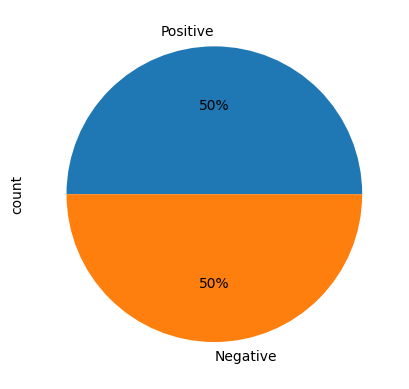

In [195]:
data_cpy["sentiment"].value_counts().plot(kind="pie",autopct="%.f%%",labels=["Positive","Negative"])

<Figure size 1000x700 with 0 Axes>

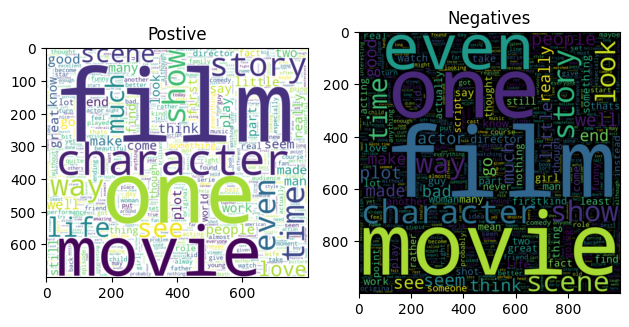

In [196]:
plt.figure(figsize=(10,7))
fig,ax = plt.subplots(1,2)
wc = WordCloud(width=800,height=700,max_words=1000,colormap="viridis",background_color="white").generate(" ".join(data_cpy[data_cpy["sentiment"]==1]["cleaned_reviews"]),)
ax[0].set_title("Postive")
ax[0].imshow(wc,interpolation="bilinear")

wc1 = WordCloud(width=1000,height=1000,max_words=1000,colormap="viridis",background_color="black").generate(" ".join(data_cpy[data_cpy["sentiment"]==0]["cleaned_reviews"]))
ax[1].set_title("Negatives")
ax[1].imshow(wc1,interpolation="bilinear")
plt.tight_layout()
plt.show()


<Figure size 2000x1000 with 0 Axes>

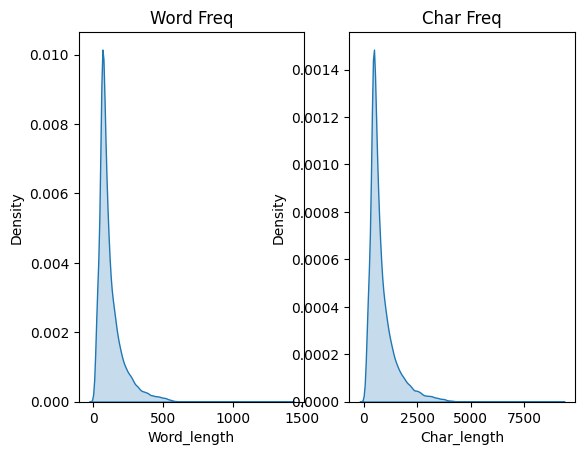

In [197]:
plt.figure(figsize=(20,10))
fig,ax = plt.subplots(1,2)
sns.kdeplot(data_cpy["Word_length"],shade=True,ax=ax[0])
sns.kdeplot(data_cpy["Char_length"],shade=True,ax=ax[1])
ax[0].set_title("Word Freq")
ax[1].set_title("Char Freq")
plt.show()


In [198]:
data["cleaned_reviews"] = data_cpy["cleaned_reviews"]

In [201]:
data.to_csv("Cleaned.csv",index=False)